In [275]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import APFcommonstuff as APF


from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.coordinates import Angle

pandas.set_option("display.precision", 8)

In [276]:
# importantly, this correlation analysis must have cleaned data to be useful. 
data = pandas.read_csv('final_data_cleaned.csv')

In [277]:
HD10700_coords = SkyCoord.from_name('HD 10700')
HD185144_coords = SkyCoord.from_name('HD 185144')
HD9407_coords = SkyCoord.from_name('HD 9407')
stars = {'HD10700_APF.vels': HD10700_coords, 
         'HD185144_APF.vels': HD185144_coords, 
         'HD9407_APF.vels': HD9407_coords}

In [136]:
for star_name, coord in stars.items():
    print(star_name, Angle(coord.ra).degree, Angle(coord.dec).degree,
          coord.ra, coord.dec)
    
"""
HD9407     01 34 33.26 +68 56 53.28
HD10700    01 44 04.08 -15 56 14.92
HD185144   19 32 21.59 +69 39 40.24
"""

HD10700 26.01701426083 -15.93747959778 26d01m01.2513s -15d56m14.9266s
HD185144 293.08995957917 69.66117631583 293d05m23.8545s 69d39m40.2347s
HD9407 23.638601620407 68.9481355878409 23d38m18.9658s 68d56m53.2881s


'\nHD9407     01 34 33.26 +68 56 53.28\nHD10700    01 44 04.08 -15 56 14.92\nHD185144   19 32 21.59 +69 39 40.24\n'

In [278]:
#EarthLocation.get_site_names() # downloads all names of observatories in directory.
def closest_star(az_0, el_0, DateTimeLocal):
    lick = EarthLocation.of_site('Lick Observatory')
    utcoffsets = [-7*u.hour, -8*u.hour]
    if az_0 >= 0:
        positive_az = az_0
    else:
        #print('az_0 < 0.')
        positive_az = 360 + az_0
        #print('positive_az = {}'.format(positive_az))
    actual_loc = np.array([positive_az, el_0])
    min_dist = 100 # degrees.
    for star_name, coords in stars.items():
        for utcoffset in utcoffsets:
            #time = Time(1436589861.0, format='unix')
            #print(star.transform_to(AltAz(obstime=time,location=lick)))
            time = Time(DateTimeLocal, format='iso') - utcoffset
            altaz = coords.transform_to(AltAz(obstime=time,location=lick))
            EL = Angle(altaz.alt).degree
            AZ = Angle(altaz.az).degree
            #print(AZ, EL)
            test_loc = np.array([AZ, EL])
            dist = np.linalg.norm(actual_loc - test_loc)
            if dist < min_dist:
                min_dist = dist
                min_dist_star_name = star_name
            print(actual_loc, test_loc, dist)
            
    if min_dist < 5.:
        print(min_dist_star_name)
        return min_dist_star_name
            #else:
                
    return '' 

closest_star(202.4085, 33.8005, '2015-01-25 18:47:47.328013')


[202.4085  33.8005] [184.98332822  36.64737508] 17.656197471806287
[202.4085  33.8005] [202.37270544  33.80573436] 0.03617525961593147
[202.4085  33.8005] [335.97904968  32.26767091] 133.5793446105326
[202.4085  33.8005] [338.75482631  27.64941934] 136.48500463911122
[202.4085  33.8005] [355.64842963  58.11963493] 155.1576500058508
[202.4085  33.8005] [346.37235769  56.22199143] 145.69940150056243
HD10700_APF.vels


'HD10700_APF.vels'

In [279]:
time = Time('2015-01-25 18:47:47.328013', format='iso')
print(HD10700.transform_to(AltAz(obstime=time,location=lick)))

data['starID_corrected'] = ''

#for index, row in data.iterrows():
#    if row['AZ'] > 100:
#        print('yes')
#        data['starID_corrected'][index] = 'HD10700'
        
#df.loc[df.ID == 103, 'FirstName'] = "Matt"
data.loc[data['AZ'] > 100, 'starID_corrected'] = 'HD10700_APF.vels' 
    
#data['starID_corrected'].str.contains('HD10700')
len(data.loc[data['starID_corrected'].str.match('HD10700')])
#data[['EpocSeconds', 'DateTimeLocal','AZ','EL', 'starID', 'starID_corrected']]

#data.loc[data['starID_corrected'] == 'HD10700_APF.vels'][['DateTimeLocal', 'starID_corrected']]

<SkyCoord (AltAz: obstime=2015-01-25 18:47:47.328, location=(-2663565.85954086, -4323362.65807416, 3848537.52539178) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (96.32923045, -18.26922647)>


312

In [280]:
for index, row in data.iterrows():
    #star = closest_star(row['AZ'], row['EL'], row['DateTimeLocal'])
    if not row['starID_corrected'] == 'HD10700_APF.vels':
        print("Index: {}".format(index))
        star_ID = closest_star(row['AZ'], row['EL'], row['DateTimeLocal'])
        data.at[index, 'starID_corrected'] = star_ID


#data.loc[data['AZ'] < 100, 'starID_corrected'] = 'HD10700_APF.vels' 

Index: 312
[334.1896  38.7183] [146.24870198  29.7179709 ] 188.15628364270938
[334.1896  38.7183] [162.24250232  34.9328916 ] 171.98876043833766
[334.1896  38.7183] [334.56274891  43.94770045] 5.242696742113591
[334.1896  38.7183] [334.19586677  38.74926094] 0.03158879690793452
[334.1896  38.7183] [16.89085081 54.88672725] 317.7104251978523
[334.1896  38.7183] [ 8.49586361 57.5517236 ] 326.2378086154882
HD185144_APF.vels
Index: 313
[334.2032  38.5812] [146.63670114  29.89088781] 187.76771027402734
[334.2032  38.5812] [162.68988703  35.0271342 ] 171.55013234610283
[334.2032  38.5812] [334.52980118  43.81325565] 5.242239471949536
[334.2032  38.5812] [334.20905921  38.61312376] 0.03245699575217618
[334.2032  38.5812] [16.70291723 54.97712529] 317.9233491358202
[334.2032  38.5812] [ 8.24734928 57.59726732] 326.51007248863726
HD185144_APF.vels
Index: 314
[334.2175  38.447 ] [147.02641488  30.06203148] 187.37878760795516
[334.2175  38.447 ] [163.13850513  35.11904159] 171.11136079465314
[334

[23.6288 31.4234] [23.60675161 31.39878976] 0.03304232364294627
[23.6288 31.4234] [25.43197404 36.3811015 ] 5.2754374924939365
[23.6288 31.4234] [355.97257888  16.67124096] 332.6710290292116
[23.6288 31.4234] [ 1.56893971 16.413892  ] 26.68188086898863
HD185144_APF.vels
Index: 333
[23.6937 31.5511] [328.97329245 -65.75666899] 320.4129077793969
[23.6937 31.5511] [  6.1055     -68.42201039] 101.50846063004738
[23.6937 31.5511] [23.67181585 31.52767409] 0.032057596441304584
[23.6937 31.5511] [25.4628434  36.51921254] 5.273709372578194
[23.6937 31.5511] [356.12186604  16.64908257] 332.76201060690414
[23.6937 31.5511] [ 1.71951228 16.4231138 ] 26.678097615934355
HD185144_APF.vels
Index: 334
[12.0895 55.9619] [ 89.37124889 -27.60559518] 113.82440406806778
[12.0895 55.9619] [ 98.21355381 -15.68635838] 112.0304671665882
[12.0895 55.9619] [12.10945102 55.94837581] 0.024102843225504957
[12.0895 55.9619] [ 3.06450589 57.55128641] 9.163878423706635
[12.0895 55.9619] [22.2541718  27.78627172] 29.95

[21.6439 28.1712] [24.26774223 32.81976518] 5.337949632267431
[21.6439 28.1712] [352.10166886  17.54802198] 330.6284756511909
[21.6439 28.1712] [357.60524539  16.47204526] 336.16498303625286
HD185144_APF.vels
Index: 353
[25.0136 34.8153] [352.20651944 -68.35604158] 343.0736542665791
[25.0136 34.8153] [ 29.63265264 -66.01446279] 100.93550768705862
[25.0136 34.8153] [24.97305292 34.71648208] 0.10681313865308009
[25.0136 34.8153] [25.87603944 39.87332155] 5.131021710155016
[25.0136 34.8153] [359.73723479  16.36616321] 335.23168455918164
[25.0136 34.8153] [ 5.31620679 16.89489754] 26.629459694077084
HD185144_APF.vels
Index: 354
[24.4431 33.2236] [339.34907755 -67.34868178] 330.5761010044023
[24.4431 33.2236] [ 17.76364194 -67.66085357] 101.10533187227709
[24.4431 33.2236] [24.3471413  33.01183445] 0.23249240517371245
[24.4431 33.2236] [25.73534196 38.09457487] 5.039472732417456
[24.4431 33.2236] [357.82270665  16.45311942] 333.801155099704
[24.4431 33.2236] [ 3.42397243 16.58356566] 26.808

[20.0239 52.0082] [13.52406447 55.4696219 ] 7.364054820886141
[20.0239 52.0082] [17.75266034 22.94225023] 29.15455308193279
[20.0239 52.0082] [21.65322887 26.98667095] 25.074521503370566
HD185144_APF.vels
Index: 376
[19.8682 52.1292] [ 77.78065942 -41.23144471] 109.86383816747964
[19.8682 52.1292] [ 87.98923115 -29.37711756] 106.22501912335824
[19.8682 52.1292] [19.89917115 52.09479332] 0.04629289677320008
[19.8682 52.1292] [13.29546917 55.5508205 ] 7.410011971289176
[19.8682 52.1292] [17.87834045 23.04937129] 29.147829742607602
[19.8682 52.1292] [21.75425391 27.11614923] 25.084056851461458
HD185144_APF.vels
Index: 377
[19.0616 52.71  ] [ 79.40285944 -39.52365346] 110.21848493421334
[19.0616 52.71  ] [ 89.34044648 -27.63539447] 106.74501709785581
[19.0616 52.71  ] [19.09601764 52.67627259] 0.048188295864686245
[19.0616 52.71  ] [12.12839542 55.93399576] 7.646141148748634
[19.0616 52.71  ] [18.49376039 23.59303806] 29.12249842281895
[19.0616 52.71  ] [22.24440876 27.76862913] 25.1436324

[12.3118 55.8818] [22.09898023 27.57281738] 29.953086544021836
[12.3118 55.8818] [24.91418963 32.35903811] 26.6859616951598
HD185144_APF.vels
Index: 396
[11.8368 56.0271] [ 89.48861427 -27.44128267] 114.00339979947312
[11.8368 56.0271] [ 98.32416598 -15.52362523] 112.24780957400465
[11.8368 56.0271] [11.99182304 55.97362394] 0.1639872894460543
[11.8368 56.0271] [ 2.93306182 57.55039626] 9.033104946990992
[11.8368 56.0271] [22.2959488  27.84171005] 30.063432937162073
[11.8368 56.0271] [25.04608276 32.65960663] 26.842594832229757
HD185144_APF.vels
Index: 397
[335.7961  32.6715] [182.92422697  36.7499618 ] 152.92626790473096
[335.7961  32.6715] [200.47224807  34.31304046] 135.33380788571455
[335.7961  32.6715] [335.73554406  32.83523796] 0.17457703545375616
[335.7961  32.6715] [338.38657637  28.15768236] 5.204336410830987
[335.7961  32.6715] [356.80770832  58.21598532] 33.07579801689034
[335.7961  32.6715] [347.33163013  56.53988829] 26.50977961069471
HD185144_APF.vels
Index: 398
[335.947

[20.3443 26.5094] [350.01759829  18.28697809] 329.7758205649916
[20.3443 26.5094] [355.41830067  16.76660973] 335.21561402470905
HD185144_APF.vels
Index: 416
[20.4816 26.6725] [302.03852851 -56.52027701] 293.59043264341176
[20.4816 26.6725] [326.20433697 -65.18431766] 319.2241639580453
[20.4816 26.6725] [20.43058115 26.62516165] 0.0695977168969421
[20.4816 26.6725] [23.45429981 31.10911008] 5.340454400331766
[20.4816 26.6725] [350.21628621  18.20914862] 329.84328340666343
[20.4816 26.6725] [355.62823088  16.73121513] 335.29404010763534
HD185144_APF.vels
Index: 417
[20.6383 26.8623] [302.86897427 -56.9634482 ] 294.4162182343732
[20.6383 26.8623] [327.56265884 -65.47126242] 320.51216637670336
[20.6383 26.8623] [20.58371048 26.80914772] 0.07619173728772659
[20.6383 26.8623] [23.56319149 31.31860218] 5.330442694882674
[20.6383 26.8623] [350.44713368  18.12094427] 329.92465514504266
[20.6383 26.8623] [355.87170118  16.69229205] 335.38762995737886
HD185144_APF.vels
Index: 418
[14.0963 21.109

[19.5535 25.6199] [353.9144177   17.06807904] 334.4702631419137
HD185144_APF.vels
Index: 436
[20.0927 26.219 ] [299.04746509 -54.80886923] 290.48455476530717
[20.0927 26.219 ] [321.31735636 -64.00860183] 314.4476327365437
[20.0927 26.219 ] [19.83403585 25.93958334] 0.38076346092997704
[20.0927 26.219 ] [23.02161073 30.32314622] 5.04207638205259
[20.0927 26.219 ] [349.34946252  18.55940894] 329.3458440591769
[20.0927 26.219 ] [354.71031034  16.89627266] 334.7474546486741
HD185144_APF.vels
Index: 437
[20.6765 26.9087] [301.93292324 -56.46097472] 293.3524812878055
[20.6765 26.9087] [326.03018702 -65.14474433] 318.9274381299627
[20.6765 26.9087] [20.40837104 26.59912396] 0.40954909777874626
[20.6765 26.9087] [23.43833452 31.07935184] 5.002206182549514
[20.6765 26.9087] [350.185092    18.21881235] 329.62315808811303
[20.6765 26.9087] [355.59584322  16.73427182] 335.0738507391097
HD185144_APF.vels
Index: 438
[23.8631 31.9034] [329.94608272 -65.93506499] 321.3396295844765
[23.8631 31.9034] [ 

[23.0081 49.0229] [ 80.91735881 -37.86273805] 104.41549863494932
[23.0081 49.0229] [23.04291437 48.96172282] 0.07038954386333764
[23.0081 49.0229] [18.2674915  53.22007543] 6.331638849171897
[23.0081 49.0229] [14.64430864 20.66046571] 29.56992872435706
[23.0081 49.0229] [19.07100742 24.13895817] 25.19347651185143
HD185144_APF.vels
Index: 457
[22.8811 49.1903] [ 69.27232083 -49.0026058 ] 108.6001478840854
[22.8811 49.1903] [ 81.29211234 -37.44310449] 104.48537283164444
[22.8811 49.1903] [22.91644423 49.12754464] 0.07202395835357756
[22.8811 49.1903] [18.05037983 53.35244854] 6.3764675068556995
[22.8811 49.1903] [14.81304429 20.76845209] 29.544795851014744
[22.8811 49.1903] [19.21468038 24.27824077] 25.18041556566158
HD185144_APF.vels
Index: 458
[22.7536 49.3498] [ 69.75623408 -48.61278937] 108.65503451918826
[22.7536 49.3498] [ 81.65651229 -37.03157057] 104.55282998252007
[22.7536 49.3498] [22.7895662  49.28915771] 0.07050571005580249
[22.7536 49.3498] [17.83448921 53.48064329] 6.423512

Index: 478
[344.9727  54.8917] [116.13051145   7.03505169] 233.7926561077442
[344.9727  54.8917] [126.63032644  17.24369888] 221.56435651986678
[344.9727  54.8917] [345.06976465  54.92294382] 0.10196922476772002
[344.9727  54.8917] [339.01522264  51.19517341] 7.011122973167266
[344.9727  54.8917] [26.54081077 43.15586211] 318.6480785565771
[344.9727  54.8917] [24.57702034 48.34907221] 320.46247443474397
HD185144_APF.vels
Index: 479
[344.7391  54.7904] [116.45253731   7.38755266] 233.15613790234661
[344.7391  54.7904] [127.00415918  17.55845526] 220.89527419797082
[344.7391  54.7904] [344.83007412  54.820848  ] 0.09593420354422702
[344.7391  54.7904] [338.86010153  51.05387016] 6.965936995236844
[344.7391  54.7904] [26.50994458 43.33145104] 318.43539826711833
[344.7391  54.7904] [24.47368549 48.51227708] 320.3269432289642
HD185144_APF.vels
Index: 480
[344.502   54.6857] [116.78064544   7.74419157] 232.50918376548762
[344.502   54.6857] [127.38557198  17.8762243 ] 220.21462444245077
[344

[344.4937  54.6787] [127.13799499  17.67233239] 220.48349993254504
[344.4937  54.6787] [344.7459769   54.78107211] 0.27225664898517266
[344.4937  54.6787] [338.80761959  51.00054876] 6.772023843637094
[344.4937  54.6787] [26.49791592 43.39286207] 318.1959912249067
[344.4937  54.6787] [24.43611783 48.56910238] 320.1158900861519
HD185144_APF.vels
Index: 500
[343.9591  54.432 ] [117.32614663   8.33366576] 231.2737597984994
[343.9591  54.432 ] [128.0210884   18.40014508] 218.92354697941104
[343.9591  54.432 ] [344.19887838  54.53520248] 0.26104486971419555
[343.9591  54.432 ] [338.45843987  50.66593025] 6.666374073436829
[343.9591  54.432 ] [26.4157322  43.80202483] 317.7212407212564
[343.9591  54.432 ] [24.18219187 48.94716972] 319.8239427231317
HD185144_APF.vels
Index: 501
[343.4104  54.1627] [118.08770355   9.14164462] 229.77644127355805
[343.4104  54.1627] [128.91021907  19.11471535] 217.34463151607542
[343.4104  54.1627] [343.66982182  54.28262261] 0.285799074858457
[343.4104  54.1627

[334.9803  45.3286] [11.33927996 56.91532539] 323.8483627482487
HD185144_APF.vels
Index: 520
[334.8256  44.8789] [143.0212416   28.19338835] 192.5287464222049
[334.8256  44.8789] [158.49772239  34.05337895] 176.65987752719383
[334.8256  44.8789] [334.90483812  45.08302577] 0.2189657677623901
[334.8256  44.8789] [334.13374643  39.90948256] 5.017347015546977
[334.8256  44.8789] [18.41593914 54.08076197] 316.54343738296257
[334.8256  44.8789] [10.56041522 57.11268172] 324.49587898459714
HD185144_APF.vels
Index: 521
[334.6909  44.4402] [144.26131094  28.80589731] 191.07030070501662
[334.6909  44.4402] [159.94341894  34.41992794] 175.03453369930796
[334.6909  44.4402] [334.76248887  44.64365236] 0.21567991708630202
[334.6909  44.4402] [334.15060979  39.45886042] 5.010554608657188
[334.6909  44.4402] [17.84071017 54.40224936] 317.00675895786094
[334.6909  44.4402] [ 9.7704326  57.29504105] 325.174656261408
HD185144_APF.vels
Index: 522
[334.5639  43.9704] [145.56592321  29.42122749] 189.55715

[334.1238  40.6418] [ 2.80688388 58.23474799] 331.78368062316326
HD185144_APF.vels
Index: 540
[334.1242  39.9354] [157.32642172  33.73580297] 176.90644253294082
[334.1242  39.9354] [174.69308207  36.64099038] 159.46515135971845
[334.1242  39.9354] [334.13048091  40.27710749] 0.34176521472723925
[334.1242  39.9354] [334.91709959  35.11003114] 4.89007918202347
[334.1242  39.9354] [11.1956752 56.9520942] 323.37656070000986
[334.1242  39.9354] [ 1.47533439 58.29308638] 333.15502764122215
HD185144_APF.vels
Index: 541
[337.6898  29.1637] [195.47423658  35.39977441] 142.35222198170476
[337.6898  29.1637] [211.76761947  30.58964331] 125.93025396169973
[337.6898  29.1637] [337.50376565  29.47173235] 0.3598509517512566
[337.6898  29.1637] [340.86453959  25.20785252] 5.072248099475493
[337.6898  29.1637] [349.93627847  57.22823904] 30.620166339331334
[337.6898  29.1637] [341.94533919  54.28359602] 25.47780975403054
HD185144_APF.vels
Index: 542
[338.1436  28.4894] [197.93318582  34.90810734] 140.3

[ 9.5862 56.6133] [25.51851641 33.86646362] 27.771519070090584
HD185144_APF.vels
Index: 561
[ 8.7469 56.7934] [ 92.48376656 -23.46738474] 115.98989778497254
[ 8.7469 56.7934] [101.18976461 -11.60645907] 114.99662576287716
[ 8.7469 56.7934] [ 9.14346134 56.70282044] 0.4067745725734999
[ 8.7469 56.7934] [359.69214774  57.63853208] 350.9462653460072
[ 8.7469 56.7934] [23.32229367 29.3827663 ] 31.044885895804143
[ 8.7469 56.7934] [25.69270878 34.36135313] 28.113291555563517
HD185144_APF.vels
Index: 562
[ 7.9775 56.9421] [ 93.30112832 -22.36676313] 116.49041729442365
[ 7.9775 56.9421] [101.98733635 -10.52689624] 115.71479933290026
[ 7.9775 56.9421] [ 8.3205257  56.87014045] 0.3504922316253183
[ 7.9775 56.9421] [358.79443942  57.62397133] 350.81760207999054
[ 7.9775 56.9421] [23.58878739 29.8214268 ] 31.292861945420572
[ 7.9775 56.9421] [25.84890626 34.84050018] 28.423016664175325
HD185144_APF.vels
Index: 563
[ 8.1379 56.9123] [ 93.15047229 -22.57012971] 116.38124453480036
[ 8.1379 56.9123] 

[334.704   35.8491] [188.76234463  36.35841174] 145.94254407024314
[334.704   35.8491] [334.62223844  36.22246094] 0.38220850882938345
[334.704   35.8491] [336.48515082  31.25408146] 4.928153163173745
[334.704   35.8491] [ 3.70158325 58.1724891 ] 331.75432716820825
[334.704   35.8491] [353.56667655  57.88257255] 29.004732015384235
HD185144_APF.vels
Index: 583
[334.9176  35.0811] [173.4594068   36.55624076] 161.46493176623417
[334.9176  35.0811] [191.42364188  36.04404185] 143.497189079529
[334.9176  35.0811] [334.81937143  35.45642675] 0.38796780890861726
[334.9176  35.0811] [336.86802705  30.54386121] 4.93869431654644
[334.9176  35.0811] [ 2.17860043 58.2645173 ] 333.5456680423303
[334.9176  35.0811] [352.11200558  57.65889905] 28.379651041064044
HD185144_APF.vels
Index: 584
[335.1984  34.2127] [176.37727172  36.72810972] 158.84104656245376
[335.1984  34.2127] [194.26975159  35.61263197] 140.93560143306658
[335.1984  34.2127] [335.06697624  34.63468853] 0.4419802330211369
[335.1984  3

[335.2805  46.0735] [335.35042389  46.20673838] 0.15047198032068748
[335.2805  46.0735] [334.15254285  41.07548022] 5.123718285027569
[335.2805  46.0735] [19.81155823 53.19322821] 315.54927309641363
[335.2805  46.0735] [12.54171896 56.56685188] 322.9093235288379
HD185144_APF.vels
Index: 602
[335.1519  45.7646] [140.68816779  26.96517593] 195.37031885814974
[335.1519  45.7646] [155.76113759  33.28030598] 179.82464579442203
[335.1519  45.7646] [335.22409598  45.91277512] 0.16482755977700286
[335.1519  45.7646] [334.14048834  40.76886052] 5.097093925261258
[335.1519  45.7646] [19.45919848 53.4295071 ] 315.7857384234433
[335.1519  45.7646] [12.03461665 56.71650131] 323.3028347244996
HD185144_APF.vels
Index: 603
[335.023   45.4317] [141.59295638  27.45314382] 194.2637646551758
[335.023   45.4317] [156.82476538  33.59301052] 178.5910563034908
[335.023   45.4317] [335.09301651  45.58602794] 0.16946805932791256
[335.023   45.4317] [334.1340777   40.42958754] 5.080483433720488
[335.023   45.431

[336.0878  32.0365] [355.38961673  58.08869423] 32.423401324271026
HD185144_APF.vels
Index: 624
[336.2235  31.7533] [168.50885574  36.03297264] 167.76923882394496
[336.2235  31.7533] [186.47138284  36.55953893] 149.8292245431904
[336.2235  31.7533] [334.48001583  36.87472345] 5.4100568565724565
[336.2235  31.7533] [336.18081792  31.86339466] 0.11807876497650337
[336.2235  31.7533] [ 4.9869695 58.051053 ] 332.2788150828127
[336.2235  31.7533] [354.83585957  58.03220929] 32.20249993995883
HD185144_APF.vels
Index: 625
[336.3446  31.5086] [169.47215923  36.15738654] 166.93718190835546
[336.3446  31.5086] [187.44731386  36.4806036 ] 148.9802760048151
[336.3446  31.5086] [334.53821189  36.59434841] 5.397024632573652
[336.3446  31.5086] [336.30915656  31.60096215] 0.09892929280876757
[336.3446  31.5086] [ 4.44183357 58.10459664] 332.9666550899121
[336.3446  31.5086] [354.29497624  57.97050437] 31.97574690202015
HD185144_APF.vels
Index: 626
[334.222   38.4541] [146.62922043  29.8980573 ] 187.7

[21.7269 50.5063] [20.25824205 25.36702857] 25.182135022145726
HD185144_APF.vels
Index: 644
[21.3618 50.8646] [ 73.87077935 -45.04524353] 109.34299702680553
[21.3618 50.8646] [ 84.83287664 -33.30287707] 105.41698993106402
[21.3618 50.8646] [21.50319042 50.71398219] 0.20658406025880102
[21.3618 50.8646] [15.73485941 54.57284428] 6.738956598507822
[21.3618 50.8646] [16.42169417 21.89864785] 29.384196935997412
[21.3618 50.8646] [20.5622474  25.70331618] 25.173984344228913
HD185144_APF.vels
Index: 645
[20.9858 51.2127] [ 74.86262304 -44.11663765] 109.50066062448154
[20.9858 51.2127] [ 85.62039297 -32.34194706] 105.63621374322221
[20.9858 51.2127] [21.13397858 51.06456843] 0.20952291933482511
[20.9858 51.2127] [15.15779317 54.8296848 ] 6.859172154889071
[20.9858 51.2127] [16.78340967 22.17417588] 29.34102874355848
[20.9858 51.2127] [20.86053633 26.04434936] 25.16866236247936
HD185144_APF.vels
Index: 646
[20.5868 51.5601] [ 75.85387202 -43.16146139] 109.66596300761114
[20.5868 51.5601] [ 86.

[13.5595 55.4691] [ 5.67198718 57.29791226] 8.096753223245557
[13.5595 55.4691] [21.30390227 26.56849258] 29.920241906461285
[13.5595 55.4691] [24.359363   31.22437345] 26.541360292993577
HD185144_APF.vels
Index: 665
[15.7915 54.5549] [ 84.42739399 -33.78780742] 111.87189056768547
[15.7915 54.5549] [ 93.6883867  -21.84424626] 109.10891121364185
[15.7915 54.5549] [16.02483477 54.43586791] 0.26194227103311263
[15.7915 54.5549] [ 7.92861323 56.95170018] 8.220075392538247
[15.7915 54.5549] [20.41123028 25.5297305 ] 29.39051500983377
[15.7915 54.5549] [23.71181376 30.03620419] 25.766214584973266
HD185144_APF.vels
Index: 666
[15.1724 54.8313] [ 85.26483447 -32.77312554] 112.19396036877183
[15.1724 54.8313] [ 94.43755558 -20.82800594] 109.57780553415623
[15.1724 54.8313] [15.42351486 54.71199308] 0.27801585435995024
[15.1724 54.8313] [ 7.14953258 57.08538151] 8.333503774207903
[15.1724 54.8313] [20.72934953 25.88770047] 29.472218130825016
[15.1724 54.8313] [23.94583682 30.44781601] 25.9138473

[20.1237 51.9363] [17.55396359 22.7879492 ] 29.261406311197234
[20.1237 51.9363] [21.48991372 26.79664524] 25.176750806498838
HD185144_APF.vels
Index: 686
[19.7541 52.2193] [ 77.77835892 -41.22421449] 109.99320444320011
[19.7541 52.2193] [ 87.986985   -29.36994613] 106.36038585414818
[19.7541 52.2193] [19.89155302 52.10314573] 0.17995873526554665
[19.7541 52.2193] [13.28276405 55.55714081] 7.281440122597155
[19.7541 52.2193] [17.87232922 23.05688619] 29.223063501243214
[19.7541 52.2193] [21.74637889 27.12230265] 25.17594985492116
HD185144_APF.vels
Index: 687
[19.3498 52.5139] [ 78.55808296 -40.41244269] 110.18586994873647
[19.3498 52.5139] [ 88.63335374 -28.54091478] 106.6306420158355
[19.3498 52.5139] [19.51615694 52.38279489] 0.21180930611517443
[19.3498 52.5139] [12.7331096  55.74383558] 7.362952922947069
[19.3498 52.5139] [18.16735845 23.3134581 ] 29.224372968312803
[19.3498 52.5139] [21.98231364 27.43118072] 25.22048640534153
HD185144_APF.vels
Index: 688
[18.9086 52.8179] [ 79.416

[23.3778 48.5081] [ 79.47458129 -39.43306183] 104.3096199510238
[23.3778 48.5081] [23.48338674 48.33305883] 0.20442106178842775
[23.3778 48.5081] [19.04498042 52.70956659] 6.035366350341521
[23.3778 48.5081] [13.99761915 20.26741275] 29.757758804067883
[23.3778 48.5081] [18.51581725 23.62527335] 25.353381200663247
HD185144_APF.vels
Index: 707
[23.0716 48.9335] [ 68.11777162 -49.89854107] 108.61367279931171
[23.0716 48.9335] [ 80.42917318 -38.3931511 ] 104.47887438977433
[23.0716 48.9335] [23.19148714 48.75145717] 0.21797366341677618
[23.0716 48.9335] [18.52969637 53.0497207 ] 6.129613484339939
[23.0716 48.9335] [14.42275613 20.52667057] 29.694283263902605
[23.0716 48.9335] [18.88053581 23.96385102] 25.318933417622375
HD185144_APF.vels
Index: 708
[22.7518 49.3447] [ 69.38382557 -48.90352467] 108.75320436598352
[22.7518 49.3447] [ 81.3750253  -37.33899311] 104.64580830994292
[22.7518 49.3447] [22.87740534 49.16921459] 0.2158050773059064
[22.7518 49.3447] [17.9881578  53.38423687] 6.24581

[ 3.4146 57.5243] [24.85201249 32.24286677] 33.146847820001575
[ 3.4146 57.5243] [26.48138155 37.44316967] 30.58313598202016
HD185144_APF.vels
Index: 728
[ 2.6634 57.5736] [ 98.27205466 -15.58118892] 120.38537281981445
[ 2.6634 57.5736] [106.97867446  -3.92275433] 121.09284901497881
[ 2.6634 57.5736] [ 2.97209043 57.5471867 ] 0.3098184067352769
[ 2.6634 57.5736] [353.34330076  57.15648034] 350.6801488382254
[ 2.6634 57.5736] [25.02507832 32.63372644] 33.49689463325508
[ 2.6634 57.5736] [26.54872223 37.85700849] 30.971803285568978
HD185144_APF.vels
Index: 729
[ 1.8714 57.6122] [ 98.96465555 -14.63347716] 121.02288271868159
[ 1.8714 57.6122] [107.6927567   -3.00775875] 121.95465933035032
[ 1.8714 57.6122] [ 2.19633071 57.59040561] 0.3256608051654112
[ 1.8714 57.6122] [352.60418347  57.03921191] 350.7332515149571
[ 1.8714 57.6122] [25.19629262 33.04050743] 33.87947300717925
[ 1.8714 57.6122] [26.60860876 38.28589393] 31.39164862477103
HD185144_APF.vels
Index: 730
[ 1.0714 57.6375] [ 99.67

[334.2102  38.5724] [162.37400757  34.97820278] 171.87377718039266
[334.2102  38.5724] [180.11405072  36.80818903] 154.10624797411248
[334.2102  38.5724] [334.20753542  38.70784109] 0.13546729554843825
[334.2102  38.5724] [335.43133839  33.59810482] 5.121990967029131
[334.2102  38.5724] [ 8.42805006 57.56131261] 326.33508548511594
[334.2102  38.5724] [358.40067791  58.28537975] 31.205460938603963
HD185144_APF.vels
Index: 749
[334.6467  36.0737] [170.36726057  36.26950293] 164.27955611453467
[334.6467  36.0737] [188.35079876  36.40404138] 146.29627420572487
[334.6467  36.0737] [334.59442525  36.34004078] 0.2714222959025786
[334.6467  36.0737] [336.42843028  31.36353121] 5.035896428908177
[334.6467  36.0737] [ 3.93526519 58.15191311] 331.4475834969336
[334.6467  36.0737] [353.79564578  57.91107958] 29.043988555696835
HD185144_APF.vels
Index: 750
[334.8291  35.3817] [172.52033948  36.48429373] 162.3125055360674
[334.8291  35.3817] [190.49787377  36.16765139] 144.33336614888898
[334.8291  

[334.3344  37.6429] [165.23160994  35.53149599] 169.1159709610522
[334.3344  37.6429] [183.10749748  36.75286919] 151.2295215917425
[334.3344  37.6429] [334.31512705  37.84295746] 0.20098366927564695
[334.3344  37.6429] [335.76790051  32.77601905] 5.073603644980108
[334.3344  37.6429] [ 6.83478142 57.820899  ] 328.12063606536486
[334.3344  37.6429] [356.71745963  58.19774591] 30.389192966240078
HD185144_APF.vels
Index: 769
[334.417   37.1576] [166.87783778  35.80332002] 167.54463570216964
[334.417   37.1576] [184.80721288  36.67502879] 149.6105653965068
[334.417   37.1576] [334.39271229  37.35478084] 0.19867102835504455
[334.417   37.1576] [335.97157249  32.31491334] 5.086089829881449
[334.417   37.1576] [ 5.90952777 57.94608979] 329.1645798390932
[334.417   37.1576] [355.76554761  58.12379766] 29.922264774633465
HD185144_APF.vels
Index: 770
[334.5145  36.6647] [168.52837639  36.04232018] 165.98729043931814
[334.5145  36.6647] [186.49335464  36.56454501] 148.02117924840982
[334.5145  3

[350.0917  56.5353] [342.72097745  53.78031992] 7.868765225904578
[350.0917  56.5353] [26.71839947 39.59800796] 323.816558189863
[350.0917  56.5353] [26.10283268 44.94609285] 324.196076273543
HD185144_APF.vels
Index: 788
[353.5034  57.1823] [106.66735609  -4.32348487] 254.38355714691596
[353.5034  57.1823] [115.91887345   6.81156355] 242.86543259116618
[353.5034  57.1823] [353.65435549  57.19589852] 0.15156674651822866
[353.5034  57.1823] [345.21447626  54.971713  ] 8.57863343819365
[353.5034  57.1823] [26.50930865 37.66720185] 327.57590697725374
[353.5034  57.1823] [26.54346147 43.03449194] 327.26588865615497
HD185144_APF.vels
Index: 789
[353.0774  57.1181] [107.078565    -3.79344231] 253.42778618103458
[353.0774  57.1181] [116.37171745   7.30877719] 241.88953840239188
[353.0774  57.1181] [353.22428944  57.13260982] 0.14760434853194848
[353.0774  57.1181] [344.87566633  54.82877126] 8.515248745408593
[353.0774  57.1181] [26.54764295 37.91459259] 327.0939573523045
[353.0774  57.1181] [

[340.7565  25.3092] [210.53837504  31.09120811] 130.34642950557748
[340.7565  25.3092] [337.28440256  29.83151185] 5.701470434003609
[340.7565  25.3092] [340.57189584  25.51747767] 0.27831328258727056
[340.7565  25.3092] [350.69622171  57.37929773] 33.57512824125342
[340.7565  25.3092] [342.51315797  54.57033214] 29.313814175424913
HD185144_APF.vels
Index: 815
[341.302   24.7573] [196.2646734   35.25241004] 145.4165514757381
[341.302   24.7573] [212.45803503  30.30096827] 128.96317135670657
[341.302   24.7573] [337.64670399  29.25185214] 5.793288171988622
[341.302   24.7573] [341.05164943  25.02035235] 0.36314177334004966
[341.302   24.7573] [349.53363034  57.11958702] 33.39277405685774
[341.302   24.7573] [341.66148784  54.1050656 ] 29.349967239396772
HD185144_APF.vels
Index: 816
[341.916   24.1735] [198.79757352  34.71897321] 143.50641450128316
[341.916   24.1735] [214.65473606  29.3221316 ] 127.36537091049749
[341.916   24.1735] [338.09164133  28.58472487] 5.838203840807165
[341.916

[20.8173 51.3604] [21.0195094  51.16647562] 0.2801701352153899
[20.8173 51.3604] [14.98226343 54.90278961] 6.826139168953649
[20.8173 51.3604] [16.88146552 22.25666585] 29.368659048701247
[20.8173 51.3604] [20.93955457 26.14439338] 25.216302984957974
HD185144_APF.vels
Index: 835
[20.4257 51.6917] [ 76.22316085 -42.79050249] 109.72804210575721
[20.4257 51.6917] [ 86.7146761 -30.9757723] 105.96291487206702
[20.4257 51.6917] [20.57629197 51.55373005] 0.20423919573663105
[20.4257 51.6917] [14.30513841 55.17851643] 7.044087096360522
[20.4257 51.6917] [17.28354558 22.57702021] 29.283744870713956
[20.4257 51.6917] [21.26791832 26.53706412] 25.168731353835092
HD185144_APF.vels
Index: 836
[20.07   51.9775] [ 77.08366827 -41.93045476] 109.86019450501753
[20.07   51.9775] [ 87.41581357 -30.09301249] 106.16509607933169
[20.07   51.9775] [20.20129179 51.86169335] 0.17506774425246707
[20.07   51.9775] [13.74169914 55.39272041] 7.191044583975864
[20.07   51.9775] [17.60506999 22.84200387] 29.23957959

[24.1619 47.2464] [ 76.46839839 -42.54356593] 103.91442515416585
[24.1619 47.2464] [24.25332481 47.05071971] 0.21598442275317842
[24.1619 47.2464] [20.47263643 51.63879921] 5.7361865857667675
[24.1619 47.2464] [12.68801381 19.53849735] 29.989630432169413
[24.1619 47.2464] [17.3775468  22.64956448] 25.51532414263649
HD185144_APF.vels
Index: 863
[23.9004 47.7025] [ 64.15570957 -52.75203315] 108.22016068274094
[23.9004 47.7025] [ 77.54621932 -41.45576868] 104.05321141098565
[23.9004 47.7025] [24.00179626 47.50708916] 0.22015130747834724
[23.9004 47.7025] [19.99173465 52.02490296] 5.827592306711217
[23.9004 47.7025] [13.15100786 19.78810376] 29.912588468129552
[23.9004 47.7025] [17.78159195 22.98675158] 25.46189372110244
HD185144_APF.vels
Index: 864
[ 4.6196 57.4233] [ 96.49247802 -18.01604273] 118.87691174925433
[ 4.6196 57.4233] [105.16459577  -6.28197707] 119.02797360530472
[ 4.6196 57.4233] [ 4.93238399 57.38241319] 0.315445015858699
[ 4.6196 57.4233] [355.26394202  57.40318979] 350.64

[25.8051 38.6435] [25.53379547 43.53573515] 4.899752124315657
[25.8051 38.6435] [ 3.65797177 16.62944106] 31.22681667862341
[25.8051 38.6435] [ 9.10433088 17.96247734] 26.582332241809915
HD185144_APF.vels
Index: 885
[25.855  39.2585] [ 23.85632734 -66.92496279] 106.20227146101158
[25.855  39.2585] [ 51.84040918 -59.47915531] 102.09978484792391
[25.855  39.2585] [25.82505426 38.99353636] 0.2666504802184633
[25.855  39.2585] [25.37473213 44.18828794] 4.95312692998688
[25.855  39.2585] [ 4.36251981 16.73561387] 31.132091232147094
[25.855  39.2585] [ 9.77361212 18.21145938] 26.48752451942938
HD185144_APF.vels
Index: 886
[23.1891 48.7737] [ 67.58701782 -50.29754656] 108.56466737432731
[23.1891 48.7737] [ 80.03571026 -38.81809746] 104.42154988918931
[23.1891 48.7737] [23.31076102 48.58414726] 0.2252368700463666
[23.1891 48.7737] [18.73882345 52.91427909] 6.078598236555177
[23.1891 48.7737] [14.24527693 20.42300353] 29.72799961701027
[23.1891 48.7737] [18.72718336 23.82698317] 25.342600113574

[13.9008 55.3377] [ 5.53097344 57.30978839] 8.599019084791482
[13.9008 55.3377] [21.34848347 26.62871431] 29.659296154757765
[13.9008 55.3377] [24.3895223  31.29182474] 26.233898160517697
HD185144_APF.vels
Index: 908
[13.3349 55.5433] [ 87.6379059  -29.80225335] 113.15829692700383
[13.3349 55.5433] [ 96.59911893 -17.8651803 ] 111.00331136756246
[13.3349 55.5433] [13.5574889  55.45445057] 0.23966652074395853
[13.3349 55.5433] [ 4.8132722  57.39154596] 8.719756505754031
[13.3349 55.5433] [21.61425459 26.9608169 ] 29.757453727382117
[13.3349 55.5433] [24.57610462 31.66766033] 26.38959740165292
HD185144_APF.vels
Index: 909
[12.7325 55.7485] [ 88.32760703 -28.92175029] 113.50626190259912
[12.7325 55.7485] [ 97.23805483 -16.99054633] 111.49958591229878
[12.7325 55.7485] [12.97938025 55.6566759 ] 0.2634037261654724
[12.7325 55.7485] [ 4.11061587 57.46009171] 8.790132661488316
[12.7325 55.7485] [21.86727859 27.2871691 ] 29.891328781822317
[12.7325 55.7485] [24.75090865 32.03531839] 26.58490415

Index: 928
[359.7454  57.6499] [100.89759732 -11.99125445] 268.05237425397826
[359.7454  57.6499] [109.70922233  -0.4666898 ] 256.7014377731023
[359.7454  57.6499] [7.81847517e-03 5.76425375e+01] 359.73758160017275
[359.7454  57.6499] [350.58294841  56.64615003] 9.217268203816474
[359.7454  57.6499] [25.62658668 34.19177971] 334.94128563411016
[359.7454  57.6499] [26.71593048 39.48874384] 333.52429470687446
Index: 929
[359.0053  57.64  ] [101.57218262 -11.0764211 ] 266.44653582175147
[359.0053  57.64  ] [110.42073144   0.40940764] 255.08749171400146
[359.0053  57.64  ] [359.24749329  57.63647189] 0.24221899085054577
[359.0053  57.64  ] [349.90223245  56.48805894] 9.175663850443637
[359.0053  57.64  ] [25.76288281 34.59618823] 334.0382102068868
[359.0053  57.64  ] [26.73599428 39.90821592] 332.74210387172565
HD185144_APF.vels
Index: 930
[358.3382  57.6209] [102.14998583 -10.29563099] 265.03783930632216
[358.3382  57.6209] [111.03333522   1.15559599] 253.66912839259413
[358.3382  57.6209

[343.5503  54.2333] [23.97420444 49.21798973] 319.61544735530515
HD185144_APF.vels
Index: 950
[342.9908  53.9454] [118.72255041   9.81630233] 228.5686440321997
[342.9908  53.9454] [129.65484638  19.70973133] 216.0655227334348
[342.9908  53.9454] [343.23100674  54.06036903] 0.2663027534360943
[342.9908  53.9454] [337.85546135  50.03629043] 6.453901194751984
[342.9908  53.9454] [26.2233758  44.54055204] 316.9070087553162
[342.9908  53.9454] [23.6704084  49.62023441] 319.34968224329356
HD185144_APF.vels
Index: 951
[342.3505  53.5921] [119.75708566  10.875583  ] 226.65508803141768
[342.3505  53.5921] [130.86937563  20.63610862] 214.03355655462062
[342.3505  53.5921] [342.56709841  53.70334877] 0.24349775888083347
[342.3505  53.5921] [337.45276605  49.5747005 ] 6.334611005137718
[342.3505  53.5921] [26.06713837 45.07551202] 316.3980042832749
[342.3505  53.5921] [23.27607394 50.10381814] 319.0934933164461
HD185144_APF.vels
Index: 952
[341.9021  53.3281] [120.54726533  11.66720489] 225.241188

HD185144_APF.vels
Index: 978
[337.317   29.7631] [194.19969807  35.63421832] 143.23767710772205
[337.317   29.7631] [210.65327919  31.05375255] 126.67029625946283
[337.317   29.7631] [337.30598176  29.80118361] 0.039645467051771015
[337.317   29.7631] [340.59947483  25.4919526 ] 5.3867746492756705
[337.317   29.7631] [350.6308449   57.36700061] 30.646921452765334
[337.317   29.7631] [342.46390651  54.54629425] 25.312000389459275
HD185144_APF.vels
Index: 979
[337.3996  29.6287] [194.69697023  35.54900781] 142.82538495371733
[337.3996  29.6287] [211.08975041  30.87851542] 126.31603279766821
[337.3996  29.6287] [337.38653018  29.66964303] 0.04297850600168498
[337.3996  29.6287] [340.70679983  25.37881128] 5.385083548506668
[337.3996  29.6287] [350.36596671  57.31062271] 30.568210783880442
[337.3996  29.6287] [342.26828111  54.44283502] 25.28725672655071
HD185144_APF.vels
Index: 980
[337.4815  29.4974] [195.20959986  35.45792394] 142.3967043668986
[337.4815  29.4974] [211.53876617  30.6950

[344.4674  55.4983] [339.42370114  26.80448522] 29.133724531896533
[344.4674  55.4983] [353.68089128  57.89934485] 9.52120990083185
[344.4674  55.4983] [344.78865248  55.63224417] 0.34805774832772196
HD9407_APF.vels
Index: 1003
[343.75    55.1856] [190.24983162  36.18017014] 154.67226013635528
[343.75    55.1856] [207.1460778   32.32953594] 138.5028202751929
[343.75    55.1856] [336.68594057  30.85266811] 25.337571115936555
[343.75    55.1856] [339.76328294  26.40120047] 29.059173582152827
[343.75    55.1856] [352.737356    57.76256246] 9.349508195033454
[343.75    55.1856] [344.05146051  55.32157033] 0.33070586657360507
HD9407_APF.vels
Index: 1004
[339.2728  52.5312] [200.81372728  34.21835593] 139.66486700510333
[339.2728  52.5312] [216.38569367  28.47535835] 125.21950495321873
[339.2728  52.5312] [338.45100674  28.05846991] 24.486524098515957
[339.2728  52.5312] [342.09362944  24.00867225] 28.661675944451712
[339.2728  52.5312] [347.15656488  56.47872282] 8.81684099251314
[339.2728 

[16.1607 21.6884] [ 82.93613963 -35.56560951] 87.96010995160869
[16.1607 21.6884] [22.31763665 49.85400827] 28.830701661819873
[16.1607 21.6884] [17.0462745  53.92222825] 32.24599084652526
[16.1607 21.6884] [15.56134414 21.26243051] 0.7353077210978958
[16.1607 21.6884] [19.84868974 24.91038768] 4.897190315185391
HD9407_APF.vels
Index: 1023
[25.5192 46.582 ] [121.25774094  12.3469219 ] 101.6755073417365
[25.5192 46.582 ] [132.63547743  21.90774226] 109.92140777131021
[25.5192 46.582 ] [341.68195993  53.18761694] 316.231758275169
[25.5192 46.582 ] [336.92838654  48.9214688 ] 311.4179740747818
[25.5192 46.582 ] [25.82599225 45.83583322] 0.8067752807412962
[25.5192 46.582 ] [22.68678    50.78637167] 5.0694520629099316
HD9407_APF.vels
Index: 1024
[16.9382 22.2774] [ 74.37671979 -44.58024458] 88.1426581989106
[16.9382 22.2774] [ 85.23379795 -32.82106242] 87.75038040167702
[16.9382 22.2774] [21.32765477 50.87953303] 28.93698891109209
[16.9382 22.2774] [15.46139432 54.69393641] 32.450158520310

[24.9777 32.503 ] [354.16722163  57.27241716] 330.1200769083705
[24.9777 32.503 ] [24.84003681 32.19408385] 0.33820162516163305
[24.9777 32.503 ] [26.48289395 37.39336093] 5.11676057896269
HD9407_APF.vels
Index: 1053
[20.6063 25.7345] [ 83.94709391 -34.36971404] 87.31879934615061
[20.6063 25.7345] [ 93.26194138 -22.42805809] 87.16922751607635
[20.6063 25.7345] [16.36377492 54.26583938] 28.845040226501524
[20.6063 25.7345] [ 8.37727518 56.86271902] 33.44420828283387
[20.6063 25.7345] [20.23292884 25.32118307] 0.5569891458714991
[20.6063 25.7345] [23.58253506 29.79772387] 5.036642073778355
HD9407_APF.vels
Index: 1054
[354.1246  57.9617] [186.5473164   36.55112941] 168.93951140175432
[354.1246  57.9617] [203.80628477  33.40547699] 152.31087939229846
[354.1246  57.9617] [336.18028354  31.85410764] 31.679723361957514
[354.1246  57.9617] [339.04492325  27.28352033] 34.18402197770013
[354.1246  57.9617] [354.78192231  58.03929414] 0.6618863013532937
[354.1246  57.9617] [345.66303935  55.97735

[20.3848 25.4976] [ 83.31744357 -35.11922345] 87.3780116027773
[20.3848 25.4976] [ 92.70640491 -23.18117799] 87.17819660678651
[20.3848 25.4976] [16.78999206 54.06015791] 28.78788562076383
[20.3848 25.4976] [ 8.93637659 56.75825522] 33.2910643158556
[20.3848 25.4976] [19.9883286  25.06938781] 0.5835711234606085
[20.3848 25.4976] [23.39660798 29.50401114] 5.01221682941993
HD9407_APF.vels
Index: 1078
[21.2442 26.4917] [ 85.55350207 -32.4315268 ] 87.2217460789155
[21.2442 26.4917] [ 94.69743053 -20.48639566] 87.19127563988779
[21.2442 26.4917] [15.21953544 54.80520288] 28.947383796562765
[21.2442 26.4917] [ 6.8856888 57.1302269] 33.83616666294475
[21.2442 26.4917] [20.83964373 26.01149316] 0.627904756429855
[21.2442 26.4917] [24.02702173 30.590193  ] 4.953962210854062
HD9407_APF.vels
Index: 1079
[17.5112 22.7483] [ 75.24605508 -43.7557495 ] 88.06873503561548
[17.5112 22.7483] [ 85.92746938 -31.96926505] 87.60592355128607
[17.5112 22.7483] [20.99371207 51.1947596 ] 28.658837272462662
[17.5

[26.699  41.9018] [340.74951923  52.5709978 ] 314.2316986120841
[26.699  41.9018] [26.73750414 41.36373016] 0.5394457553035884
[26.699  41.9018] [25.48033372 46.65772042] 4.909574989548798
HD9407_APF.vels
Index: 1103
[26.7546 40.8596] [111.25767741   1.41189987] 93.25712378426583
[26.7546 40.8596] [121.04255052  12.14208805] 98.56425875955424
[26.7546 40.8596] [349.14057656  56.29841344] 322.7554412329641
[26.7546 40.8596] [341.80182688  53.26009926] 315.29117898910584
[26.7546 40.8596] [26.75897376 40.3972994 ] 0.46232129319799053
[26.7546 40.8596] [25.85961339 45.72749199] 4.949482140826104
HD9407_APF.vels
Index: 1104
[26.7039 41.8442] [112.94549525   3.41940948] 94.41439126244428
[26.7039 41.8442] [122.96238321  13.97956153] 100.21044689188216
[26.7039 41.8442] [347.63718917  55.86210439] 321.23928424509006
[26.7039 41.8442] [340.7403113   52.56411657] 314.219325044572
[26.7039 41.8442] [26.73701279 41.37264353] 0.47271763743194956
[26.7039 41.8442] [25.47646743 46.66623795] 4.97580

[22.9592 50.4812] [334.79357927  44.75402686] 311.886967675028
[22.9592 50.4812] [23.32530261 50.06499183] 0.554310707980089
[22.9592 50.4812] [17.98379652 54.32583384] 6.2877538978281535
HD9407_APF.vels
Index: 1125
[21.3383 52.041 ] [132.88313157  22.08959991] 115.49604243370895
[21.3383 52.041 ] [146.49296217  29.83966466] 127.10857073020179
[21.3383 52.041 ] [336.85955783  48.82087611] 315.53768925274983
[21.3383 52.041 ] [334.54588771  43.86612694] 313.31425366154315
[21.3383 52.041 ] [22.59308937 50.87457638] 1.713195968124741
[21.3383 52.041 ] [16.77653337 54.94585371] 5.408131826760326
HD9407_APF.vels
Index: 1126
[25.5965 46.3862] [120.58291185  11.69103241] 101.12454247614976
[25.5965 46.3862] [131.84020438  21.34269388] 109.15540260767881
[25.5965 46.3862] [342.07458732  53.42076199] 316.5562585349922
[25.5965 46.3862] [337.15989369  49.21540027] 311.5762389251528
[25.5965 46.3862] [25.94154916 45.4958726 ] 0.9548517146776639
[25.5965 46.3862] [22.95972399 50.48284835] 4.87186

[ 3.7301 58.1711] [334.43103482  37.11921159] 331.3703219915874
[ 3.7301 58.1711] [336.07025664  32.09253539] 333.36177232911854
[ 3.7301 58.1711] [ 5.44301097 58.00899926] 1.7205640466840353
[ 3.7301 58.1711] [355.28766086  58.08648958] 351.5575710373434
HD9407_APF.vels
Index: 1146
[ 7.1669 57.7768] [161.64681867  34.81632052] 156.1769153563546
[ 7.1669 57.7768] [179.34224863  36.80147852] 173.44830580380383
[ 7.1669 57.7768] [334.18740013  38.93273766] 327.5629804987046
[ 7.1669 57.7768] [335.35029684  33.8132291 ] 329.0571298269305
[ 7.1669 57.7768] [ 8.83239352 57.48826503] 1.6903020703148806
[ 7.1669 57.7768] [358.83548435  58.30114874] 351.6689752629256
HD9407_APF.vels
Index: 1147
[ 3.7394 58.1702] [167.68982509  35.92030227] 165.453316185277
[ 3.7394 58.1702] [185.63744821  36.62008695] 183.17015945108056
[ 3.7394 58.1702] [334.43059183  37.12271897] 331.3603187018851
[ 3.7394 58.1702] [336.06890595  32.0958691 ] 333.3508230890806
[ 3.7394 58.1702] [ 5.45024377 58.00801174] 1.71

[333.7282  36.4236] [357.42765974  17.17557384] 30.531146437315307
[333.7282  36.4236] [ 2.87488792 17.20720152] 331.4108991652911
[333.7282  36.4236] [333.54732491  37.30147674] 0.8963165534715858
[333.7282  36.4236] [335.21225694  32.10996151] 4.561787146833227
HD9407_APF.vels
Index: 1166
[25.1149 47.3815] [122.29483132  13.35299063] 102.96542380912071
[25.1149 47.3815] [133.86326199  22.77080283] 111.49839752871813
[25.1149 47.3815] [341.09341762  52.79462364] 316.02488114651993
[25.1149 47.3815] [336.59823831  48.43934842] 311.4851346183722
[25.1149 47.3815] [25.60708667 46.33780607] 1.1539257963120917
[25.1149 47.3815] [22.22883829 51.22455971] 4.806085740332458
HD9407_APF.vels
Index: 1167
[24.0585 49.1023] [126.73349727  17.33301655] 107.47763690977212
[24.0585 49.1023] [139.14327831  26.09615577] 117.36178624263499
[24.0585 49.1023] [338.97199439  51.14253274] 314.9201033540589
[24.0585 49.1023] [335.47280791  46.47515702] 311.42538921698105
[24.0585 49.1023] [24.53979921 48.387

[24.6284 48.2518] [21.1805451  52.16876681] 5.2182691003425345
HD9407_APF.vels
Index: 1186
[23.4231 49.9358] [128.47658528  18.77314629] 109.57803500221833
[23.4231 49.9358] [141.22614905  27.26098019] 119.96543593266463
[23.4231 49.9358] [338.28163724  50.48945389] 314.85902401500266
[23.4231 49.9358] [335.13918652  45.7246754 ] 311.74453029207075
[23.4231 49.9358] [24.04063764 49.13752389] 1.0092559063568023
[23.4231 49.9358] [19.22137833 53.58765573] 5.566912541866362
HD9407_APF.vels
Index: 1187
[24.3173 48.7351] [125.64473148  16.40581141] 106.35991383912894
[24.3173 48.7351] [137.84552208  25.33573991] 115.91456880322343
[24.3173 48.7351] [339.4399507   51.55911453] 315.13530433814907
[24.3173 48.7351] [335.70467411  46.95857291] 311.3924417911504
[24.3173 48.7351] [24.83297686 47.90872036] 0.974076968868047
[24.3173 48.7351] [20.67091872 52.57409996] 5.294715963810502
HD9407_APF.vels
Index: 1188
[23.0266 50.397 ] [129.59305432  19.65668982] 110.91156773025962
[23.0266 50.397 ] [1

[24.942 47.702] [135.11061091  23.61483215] 112.77107113081449
[24.942 47.702] [340.53922875  52.40829944] 315.632317810693
[24.942 47.702] [336.29076373  47.96972656] 311.3488788386206
[24.942 47.702] [25.38199603 46.84331941] 0.9648465431735209
[24.942 47.702] [21.75804341 51.66428861] 5.083041468858412
HD9407_APF.vels
Index: 1208
[23.8315 49.4085] [127.16420987  17.70193823] 108.08771895633726
[23.8315 49.4085] [139.65877061  26.39789612] 118.09083160134128
[23.8315 49.4085] [338.79491575  50.97861693] 314.96732930025286
[23.8315 49.4085] [335.38664621  46.28615374] 311.57079159549704
[23.8315 49.4085] [24.41891221 48.57515769] 1.0195648614757615
[23.8315 49.4085] [19.90500365 53.12751333] 5.40818211414837
HD9407_APF.vels
Index: 1209
[23.319  50.0511] [128.81667132  19.04800111] 109.95885955203214
[23.319  50.0511] [141.63319242  27.48096051] 120.44774520063687
[23.319  50.0511] [338.1590144   50.35100421] 314.840157243282
[23.319  50.0511] [335.08798374  45.56977324] 311.8011890789

[12.9722 56.4222] [151.1867351   31.75132186] 140.39910947210856
[12.9722 56.4222] [335.9080587   47.32461378] 323.0639795940486
[12.9722 56.4222] [334.25601262  42.25428046] 321.5960481646359
[12.9722 56.4222] [21.07749459 52.2347521 ] 9.123076255638441
[12.9722 56.4222] [14.42321817 55.9234922 ] 1.5343282575215926
HD9407_APF.vels
Index: 1232
[ 9.9192 57.245 ] [141.81061778  27.57178014] 135.18818757458817
[ 9.9192 57.245 ] [157.08107424  33.66916251] 149.038375407064
[ 9.9192 57.245 ] [335.05998201  45.49970124] 325.3528548678336
[ 9.9192 57.245 ] [334.13357272  40.34022268] 324.6547873913049
[ 9.9192 57.245 ] [18.95139083 53.74070589] 9.688165375745902
[ 9.9192 57.245 ] [11.32125281 56.90419212] 1.4428797925369203
HD9407_APF.vels
Index: 1233
[ 5.4532 57.9922] [148.5729134   30.73245409] 145.6926426063431
[ 5.4532 57.9922] [164.91561254  35.47262078] 161.04469087926918
[ 5.4532 57.9922] [334.3942162   43.13344972] 329.2764410018853
[ 5.4532 57.9922] [334.30076888  37.93001288] 329.45

[23.6961 49.5817] [335.22500072  45.9179545 ] 311.55044377605583
[23.6961 49.5817] [24.17238396 48.93651103] 0.8019446484136623
[23.6961 49.5817] [19.46283779 53.42260562] 5.716035765894097
HD9407_APF.vels
Index: 1252
[23.92   49.2857] [127.56217356  18.03764919] 108.25036174906931
[23.92   49.2857] [140.13505937  26.67100228] 118.3949516517105
[23.92   49.2857] [338.63215333  50.82641746] 314.7159247033511
[23.92   49.2857] [335.30754881  46.11093484] 311.4037326215501
[23.92   49.2857] [24.30168506 48.74662354] 0.6605201839852026
[23.92   49.2857] [19.69526639 53.26754079] 5.805465536748415
HD9407_APF.vels
Index: 1253
[22.9169 50.5064] [130.39083179  20.27771928] 111.64416308761443
[22.9169 50.5064] [143.51643144  28.45206634] 122.5995131206971
[22.9169 50.5064] [337.61075328  49.75213948] 314.6947571834384
[22.9169 50.5064] [334.84646407  44.8962533 ] 311.98001007784075
[22.9169 50.5064] [23.43312668 49.91302651] 0.7864998954704243
[22.9169 50.5064] [18.17796632 54.2032068 ] 6.01031

[11.1241 56.9564] [ 2.66455419 58.23125261] 8.55506659500864
HD9407_APF.vels
Index: 1273
[ 8.8606 57.4693] [159.62970117  34.35318012] 152.5309046269685
[ 8.8606 57.4693] [177.19000288  36.76796398] 169.59756244567293
[ 8.8606 57.4693] [334.15351393  39.54309976] 325.7864768689939
[ 8.8606 57.4693] [335.14772324  34.400682  ] 327.1015865594436
[ 8.8606 57.4693] [ 9.93990948 57.24406366] 1.1025608227030186
[ 8.8606 57.4693] [ 0.06348549 58.30380273] 8.836606732293307
HD9407_APF.vels
Index: 1274
[11.3357 56.9009] [155.33440655  33.16143963] 145.94241832736137
[11.3357 56.9009] [172.51185053  36.48864622] 162.46357008020837
[11.3357 56.9009] [334.14766028  40.89984689] 323.208284854561
[11.3357 56.9009] [334.75182157  35.7181696 ] 324.10908003601867
[11.3357 56.9009] [12.25863929 56.64450298] 0.9578916235728641
[11.3357 56.9009] [ 2.72067235 58.22806762] 8.71665505533763
HD9407_APF.vels
Index: 1275
[ 9.2118 57.3994] [159.08297038  34.21558166] 151.65374094926096
[ 9.2118 57.3994] [176.601

[22.1087 51.3222] [336.79114304  48.70689365] 314.69331067387907
[22.1087 51.3222] [334.52866176  43.74417549] 312.51185411094855
[22.1087 51.3222] [22.48670966 50.95224646] 0.5289205259409197
[22.1087 51.3222] [16.62240659 54.99789262] 6.603796756831492
HD9407_APF.vels
Index: 1299
[21.1212 52.1952] [135.44822833  23.84101163] 117.79061679325365
[21.1212 52.1952] [149.55565985  31.13586276] 130.1495530646088
[21.1212 52.1952] [336.21024834  47.83353227] 315.11923541573606
[21.1212 52.1952] [334.33976233  42.79901336] 313.3594678805139
[21.1212 52.1952] [21.61820806 51.77464107] 0.6510659178807789
[21.1212 52.1952] [15.25207265 55.59940646] 6.784930174393571
HD9407_APF.vels
Index: 1300
[ 8.2829 57.575 ] [160.8143727   34.63689701] 154.24657770426987
[ 8.2829 57.575 ] [178.45892565  36.7992227 ] 171.43953053015753
[ 8.2829 57.575 ] [334.1757731   39.17324887] 326.41199301500785
[ 8.2829 57.575 ] [335.27230688  34.04505056] 327.83491383979384
[ 8.2829 57.575 ] [ 9.28900936 57.3812795 ] 1.

In [273]:
data.loc[data['AZ'] < 0 ][['EL', 'AZ', 'DateTimeLocal', 'starID_corrected']].head()
#closest_star(-24.5503, 33.5059	, '2015-01-04 18:54:44.640013')

,EL,AZ,DateTimeLocal,starID_corrected
312,38.7183,-25.8104,2015-01-02 18:01:33.023971,HD185144_APF.vels
313,38.5812,-25.7968,2015-01-02 18:03:07.200004,HD185144_APF.vels
314,38.4470,-25.7825,2015-01-02 18:04:41.375997,HD185144_APF.vels
315,33.6410,-24.6021,2015-01-04 18:53:08.736007,HD185144_APF.vels
316,33.5059,-24.5503,2015-01-04 18:54:44.640013,HD185144_APF.vels


In [281]:
len(data.loc[data['starID_corrected']==''])

3

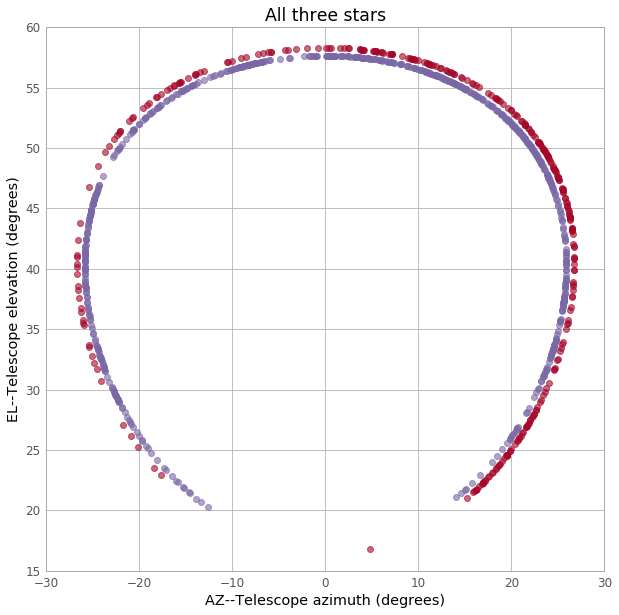

In [282]:
def plot_az_el(data, s=None, xylim=None):  
    fig = plt.figure(figsize=(10, 10))
    if not s:
        s = 40
        
    plt.title('All three stars')
    #plt.scatter(data[xname], data[yname], s=40, alpha=0.1)
    plt.scatter(data.loc[data['starID_corrected'] == 'HD10700_APF.vels'].AZ, 
              data.loc[data['starID_corrected'] == 'HD10700_APF.vels'].EL,
               alpha = 0.2)
    plt.scatter(data.loc[data['starID_corrected'] == 'HD185144_APF.vels'].AZ, 
              data.loc[data['starID_corrected'] == 'HD185144_APF.vels'].EL,
               alpha = 0.6)
    plt.scatter(data.loc[data['starID_corrected'] == 'HD9407_APF.vels'].AZ, 
              data.loc[data['starID_corrected'] == 'HD9407_APF.vels'].EL,
               alpha = 0.6)
    plt.xlabel(APF.shortname_and_units('AZ'))
    plt.ylabel(APF.shortname_and_units('EL'))
    if xylim:
        plt.xlim(xylim[0])
        plt.ylim(xylim[1])
                
plot_az_el(data, xylim=[[-30, 30],[15, 60]])

In [283]:
def write_to_csv(data, filename):
    data.to_csv(filename, index=False)
    
write_to_csv(data, 'final_data_cleaned_fixed_starIDs.csv')